# 02. Gradient Boosting (XGBoost, LightGBM) | التعزيز المتدرج (XGBoost, LightGBM)

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Unit 1-4: All examples** - Data processing, regression, classification, clustering
- ✅ **Unit 3, Example 2: Decision Trees** - Understanding tree-based models
- ✅ **Unit 5, Example 1: Grid Search** - Understanding hyperparameter tuning
- ✅ **Understanding of ensemble methods**: Combining multiple models

**If you haven't completed these**, you might struggle with:
- Understanding how boosting differs from bagging (Random Forest)
- Knowing when to use XGBoost vs LightGBM vs Random Forest
- Understanding gradient boosting concepts

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This is Unit 5, Example 2** - it's the final example in the course!

**Why this example SECOND in Unit 5?**
- **Before** you can use boosting, you need to understand hyperparameter tuning
- **Before** you can use advanced models, you need to understand basic ensemble methods
- **Before** you can use XGBoost/LightGBM, you need to understand decision trees

**Builds on**: 
- 📓 Unit 3, Example 2: Decision Trees (boosting uses trees as base learners)
- 📓 Unit 5, Example 1: Grid Search (we know how to tune hyperparameters)
- 📓 All previous examples (data processing and evaluation concepts)

**Leads to**: 
- 📓 All advanced ML projects (XGBoost and LightGBM are industry standards!)
- 📓 Kaggle competitions (boosting algorithms often win)
- 📓 Production ML systems (boosting is widely used)

**Why this order?**
1. Boosting is an **advanced ensemble method** (builds on decision trees)
2. Boosting shows **sequential learning** (each model learns from previous mistakes)
3. XGBoost/LightGBM are **state-of-the-art** (often best performance)

---

## The Story: Learning from Mistakes | القصة: التعلم من الأخطاء

Imagine you're learning to play chess. **Before** boosting, you play many games independently (like Random Forest). **After** boosting, you learn from each game: focus on positions where you made mistakes, get better each time - much more effective!

Same with machine learning: **Before** boosting, models are trained independently. **After** boosting, each new model focuses on mistakes of previous models - sequential improvement leads to excellent performance!

---

## Why Boosting Matters | لماذا يهم التعزيز؟

Boosting algorithms are among the best ML models:
- **State-of-the-Art Performance**: Often achieve best results in competitions
- **Sequential Learning**: Each model learns from previous mistakes
- **XGBoost**: Extremely popular, fast, and powerful
- **LightGBM**: Even faster than XGBoost, great for large datasets
- **Industry Standard**: Used in production systems worldwide

---

## 🌍 Real-World Applications | التطبيقات في الحياة الواقعية

**XGBoost and LightGBM are used in MANY industries for state-of-the-art performance!** Here's where you'll find them:

### 🏆 Machine Learning Competitions (Kaggle, etc.) | مسابقات التعلم الآلي
- **Kaggle Competitions**: XGBoost/LightGBM often win competitions → best performance
- **Data Science Competitions**: Used by top teams worldwide
- **Hackathons**: Go-to algorithm for quick, high-performance solutions
- **Benchmarking**: Used to benchmark against other algorithms

### 💰 Finance & Banking Sector | القطاع المالي والمصرفي
- **Credit Scoring**: XGBoost predicts loan defaults with high accuracy → optimize lending decisions
- **Fraud Detection**: LightGBM detects fraudulent transactions → real-time fraud prevention
- **Algorithmic Trading**: XGBoost predicts stock movements → automated trading systems
- **Risk Assessment**: XGBoost assesses investment risks → portfolio management
- **Insurance Claims**: XGBoost predicts claim amounts → optimize insurance pricing
- **Customer Lifetime Value**: XGBoost predicts customer value → marketing optimization

### 🏥 Healthcare & Medical Sector | القطاع الصحي والطبي
- **Disease Diagnosis**: XGBoost diagnoses diseases from patient data → improve diagnosis accuracy
- **Drug Discovery**: XGBoost identifies effective drug compounds → accelerate drug development
- **Medical Imaging**: XGBoost classifies medical images → assist radiologists
- **Patient Risk Stratification**: XGBoost predicts patient outcomes → optimize treatment
- **Clinical Decision Support**: XGBoost helps doctors make decisions → improve patient care
- **Epidemiology**: XGBoost predicts disease spread → public health planning

### 📊 Marketing & E-commerce Sector | قطاع التسويق والتجارة الإلكترونية
- **Recommendation Systems**: XGBoost powers product recommendations → increase sales
- **Customer Churn**: LightGBM predicts churn → retain customers
- **Ad Click Prediction**: XGBoost predicts ad clicks → optimize ad spending
- **Price Optimization**: XGBoost optimizes pricing → maximize revenue
- **Customer Segmentation**: XGBoost segments customers → targeted marketing
- **Sales Forecasting**: XGBoost predicts sales → inventory management

### 🏭 Manufacturing & Quality Control | التصنيع ومراقبة الجودة
- **Quality Prediction**: XGBoost predicts product quality → reduce defects
- **Predictive Maintenance**: LightGBM predicts equipment failures → prevent downtime
- **Defect Detection**: XGBoost identifies defects → quality control
- **Supply Chain Optimization**: XGBoost optimizes supply chains → reduce costs
- **Production Optimization**: XGBoost optimizes production → increase efficiency
- **Energy Management**: XGBoost optimizes energy usage → reduce costs

### 🚗 Transportation & Logistics | النقل والخدمات اللوجستية
- **Route Optimization**: XGBoost optimizes delivery routes → reduce delivery time
- **Demand Forecasting**: LightGBM predicts demand → optimize inventory
- **Fleet Management**: XGBoost optimizes fleet operations → reduce costs
- **Traffic Prediction**: XGBoost predicts traffic → optimize routes
- **Maintenance Scheduling**: XGBoost schedules maintenance → prevent failures

### 🔬 Scientific Research & Data Analysis | البحث العلمي وتحليل البيانات
- **Genomics**: XGBoost identifies important genes → disease research
- **Climate Modeling**: XGBoost predicts climate patterns → environmental planning
- **Material Science**: XGBoost discovers new materials → innovation
- **Astronomy**: XGBoost classifies celestial objects → space research
- **Epidemiology**: XGBoost models disease spread → public health

### 🏛️ Government & Public Safety Sector (Ministry of Interior) | القطاع الحكومي والسلامة العامة (وزارة الداخلية)
- **Emergency Response Optimization**: XGBoost predicts emergency needs → optimize resource allocation → faster response times → **GDI: Emergency Response**
- **Threat Detection Systems**: XGBoost detects security threats with high accuracy → critical for national security → **GDI: Counter-Espionage, Terrorism Detection**
- **Traffic Flow Optimization**: LightGBM predicts traffic patterns → optimize traffic signals → reduce congestion → **GDI: Traffic Management**
- **Crime Prediction**: XGBoost predicts crime hotspots → optimize patrol routes → crime prevention → **GDI: Internal Intelligence**
- **Border Security Screening**: XGBoost classifies border crossings → identify threats → border control → **GDI: Border Security**
- **Surveillance Alert Systems**: LightGBM classifies surveillance alerts → reduce false positives → security monitoring → **GDI: Internal Intelligence**
- **Traffic Violation Detection**: XGBoost detects traffic violations → automated enforcement → **GDI: Traffic Management**
- **Personnel Security Assessment**: XGBoost assesses security clearance → optimize internal security → **GDI: Internal Intelligence**
- **Identity Verification**: XGBoost verifies identities → high-accuracy verification → **GDI: Airport Security**
- **Traffic Accident Prediction**: XGBoost predicts accident risk → optimize traffic management → **GDI: Traffic Management**
- **Financial Crime Detection**: XGBoost detects financial fraud → optimize investigations → **GDI: Financial Investigations, Terrorism Financing**
- **Cyber Threat Detection**: XGBoost detects cyber attacks → optimize network security → **GDI: Cyber Threats**

### 💡 Why XGBoost/LightGBM are Industry Standards:
- **Best Performance**: Often achieve highest accuracy
- **Fast Training**: LightGBM is very fast (important for large datasets)
- **Handles Missing Values**: Automatically handles missing data (convenient!)
- **Feature Importance**: Shows which features matter most
- **Production Ready**: Used in production systems worldwide
- **Competition Winners**: Often win ML competitions

### 📈 When to Use XGBoost vs LightGBM:
✅ **Use XGBoost when:**
- Need best possible performance
- Have medium to large datasets
- Want industry-standard solution
- Need feature importance
- Working on competitions or production

✅ **Use LightGBM when:**
- Have very large datasets (millions of rows)
- Need faster training than XGBoost
- Have limited computational resources
- Need to train quickly
- Working with big data

✅ **Use Both:**
- Try both and compare performance
- Ensemble both for even better results
- Use LightGBM for speed, XGBoost for accuracy

### 🎯 Real-World Success Stories:
- **Kaggle Competitions**: XGBoost/LightGBM used by most winning teams
- **Netflix Recommendations**: Uses boosting for recommendations
- **Amazon**: Uses XGBoost for product recommendations
- **Banks**: Use XGBoost for credit scoring and fraud detection
- **Healthcare**: Use XGBoost for medical diagnosis

---

## Learning Objectives | أهداف التعلم
1. Build XGBoost models
2. Build LightGBM models
3. Understand how boosting differs from bagging
4. Compare boosting with Random Forest
5. Interpret feature importance in boosting models
6. Know when to use each boosting algorithm

In [1]:
# Step 1: Import necessary libraries
# These libraries help us build boosting models

import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.ensemble import RandomForestClassifier  # For comparison (bagging)
from sklearn.metrics import (
    accuracy_score,        # Classification accuracy
    classification_report,  # Comprehensive metrics
    confusion_matrix       # Confusion matrix (for multi-class)
)
# Note: ROC curves removed - they only work for binary classification
# We use confusion matrices for multi-class (3 classes: EMS, Fire, Traffic)
# Removed make_classification - using real Breast Cancer dataset instead

print("✅ Libraries imported successfully!")
print("\n📚 Key Boosting Concepts:")
print("   - Boosting: Sequential ensemble (each model learns from previous mistakes)")
print("   - Bagging: Parallel ensemble (Random Forest - models trained independently)")
print("   - XGBoost: Extreme Gradient Boosting (very popular, fast, powerful)")
print("   - LightGBM: Light Gradient Boosting Machine (faster than XGBoost)")
print("   - Learning Rate: Controls how much each new model contributes")
print("\n   💡 Boosting vs Bagging:")
print("   - Bagging (RF): Models trained in parallel, then averaged")
print("   - Boosting: Models trained sequentially, each focuses on mistakes")


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


✅ Libraries imported successfully!

📚 Key Boosting Concepts:
   - Boosting: Sequential ensemble (each model learns from previous mistakes)
   - Bagging: Parallel ensemble (Random Forest - models trained independently)
   - XGBoost: Extreme Gradient Boosting (very popular, fast, powerful)
   - LightGBM: Light Gradient Boosting Machine (faster than XGBoost)
   - Learning Rate: Controls how much each new model contributes

   💡 Boosting vs Bagging:
   - Bagging (RF): Models trained in parallel, then averaged
   - Boosting: Models trained sequentially, each focuses on mistakes


In [2]:
# Try to import XGBoost and LightGBM
# These are external libraries (not part of sklearn)
# If not installed, the notebook will still work but skip those sections

import sys
import os

print("="*60)
print("🔍 DIAGNOSTIC INFO")
print("="*60)
print(f"📦 Python: {sys.executable}")
print(f"📦 Version: {sys.version.split()[0]}")
print(f"📦 Expected: /opt/anaconda3/envs/course2/bin/python")

# Check if we're in the right environment
if 'course2' in sys.executable:
    print("✅ Using course2 environment (correct!)")
else:
    print("⚠️  WARNING: Not using course2 environment!")
    print("   → Go to: Kernel → Change Kernel → course2")
    print("   → Then restart kernel and run again")

# Check for OpenMP
omp_path = "/opt/anaconda3/envs/course2/lib/libomp.dylib"
if os.path.exists(omp_path):
    print(f"✅ OpenMP found: {omp_path}")
else:
    print(f"❌ OpenMP missing: {omp_path}")

print("="*60)
print()

try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
    print("✅ XGBoost imported successfully!")
    print(f"   Version: {xgb.__version__}")
except (ImportError, Exception) as e:
    # Catch both ImportError (not installed) and XGBoostError (OpenMP issues)
    XGBOOST_AVAILABLE = False
    error_str = str(e)
    error_type = str(type(e).__name__)
    
    # Check if it's an OpenMP/runtime issue (XGBoost IS installed but can't run)
    if 'XGBoostError' in error_type or 'OpenMP' in error_str or 'libomp' in error_str or 'Library not loaded' in error_str:
        print("⚠️  XGBoost import failed (OpenMP or kernel issue)")
        print("\n   🔍 DIAGNOSIS:")
        print("   - XGBoost is installed in course2 environment")
        print("   - OpenMP libraries are available")
        print("   - This might be a kernel/environment mismatch")
        print("\n   🔧 SOLUTION:")
        print("   1. Make sure you're using 'course2' kernel in Jupyter")
        print("      (Check: Kernel → Change Kernel → course2)")
        print("   2. Restart kernel: Kernel → Restart Kernel")
        print("   3. Run this cell again")
        print("\n   💡 If still failing, try in terminal:")
        print("      conda activate course2")
        print("      python -c 'import xgboost; print(xgboost.__version__)'")
        print("\n   ✅ The notebook will still work without XGBoost (Random Forest will run)")
    elif 'No module named' in error_str or 'ImportError' in error_type:
        print("⚠️  XGBoost is NOT installed in this Python environment")
        print(f"\n   🔧 QUICK FIX - Run this in a terminal:")
        print(f"      {sys.executable} -m pip install xgboost")
        print("\n   Or install directly in notebook (uncomment next cell):")
        print("      !pip install xgboost")
        print("\n   💡 After installing, restart kernel and run this cell again")
    else:
        print(f"⚠️  Warning: XGBoost error: {error_str[:100]}")
        print("   Try: pip install --upgrade --force-reinstall xgboost")

try:
    import lightgbm as lgb
    LIGHTGBM_AVAILABLE = True
    print("✅ LightGBM imported successfully!")
except (ImportError, Exception) as e:
    # Catch both ImportError (not installed) and other errors
    LIGHTGBM_AVAILABLE = False
    if 'OpenMP' in str(e) or 'libomp' in str(e):
        print("⚠️  Warning: LightGBM installed but OpenMP runtime missing.")
        print("   Mac users: Run 'brew install libomp' to install OpenMP")
    else:
        print("⚠️  Warning: LightGBM not installed. Install with: pip install lightgbm")

print("\n" + "=" * 60)
print("Example 2: Gradient Boosting (XGBoost, LightGBM)")
print("مثال 2: التعزيز المتدرج (XGBoost, LightGBM)")
print("=" * 60)


🔍 DIAGNOSTIC INFO
📦 Python: /opt/anaconda3/envs/course2/bin/python
📦 Version: 3.8.20
📦 Expected: /opt/anaconda3/envs/course2/bin/python
✅ Using course2 environment (correct!)
✅ OpenMP found: /opt/anaconda3/envs/course2/lib/libomp.dylib

✅ XGBoost imported successfully!
   Version: 2.1.1
✅ LightGBM imported successfully!

Example 2: Gradient Boosting (XGBoost, LightGBM)
مثال 2: التعزيز المتدرج (XGBoost, LightGBM)


In [3]:
# Load real-world Montgomery 911 Calls dataset
# This is REAL emergency response data perfect for demonstrating boosting algorithms!

print("\n📥 Loading Montgomery 911 Calls dataset...")
print("تحميل مجموعة بيانات مكالمات الطوارئ في مونتغومري...")

try:
    # Load 911 calls data
    df_full = pd.read_csv('../../datasets/raw/montgomery_911_calls.csv')
    
    print(f"\n✅ Real-world Montgomery 911 Calls dataset loaded!")
    print(f"   📊 This is REAL emergency response data from Montgomery County")
    print(f"   📈 Contains {len(df_full):,} emergency call records")
    print(f"   🎯 GDI Application: Emergency Response - analyzing emergency call patterns")
    
    # Sample data for faster processing (boosting can be slow on very large datasets)
    # Use 20,000 samples for demonstration (good balance between speed and representativeness)
    sample_size = min(20000, len(df_full))
    df_sample = df_full.sample(n=sample_size, random_state=73)
    
    # Prepare features for classification
    # Target: Predict emergency category (EMS, Fire, Traffic)
    # Features: lat, lng, zip, and date/time features
    
    from sklearn.preprocessing import LabelEncoder
    
    # Extract category from title (EMS, Fire, Traffic)
    df_sample['category'] = df_sample['title'].str.split(':').str[0]
    
    # Encode target
    le_category = LabelEncoder()
    df_sample['target'] = le_category.fit_transform(df_sample['category'])
    
    # Extract date/time features
    df_sample['timeStamp'] = pd.to_datetime(df_sample['timeStamp'], errors='coerce')
    df_sample['hour'] = df_sample['timeStamp'].dt.hour
    df_sample['day_of_week'] = df_sample['timeStamp'].dt.dayofweek
    df_sample['month'] = df_sample['timeStamp'].dt.month
    
    # Select features for classification
    feature_cols = ['lat', 'lng', 'zip', 'hour', 'day_of_week', 'month']
    X_data = df_sample[feature_cols].copy()
    y_data = df_sample['target'].copy()
    
    # Handle missing values
    X_data = X_data.fillna(X_data.median())
    
    # Get category names for reference
    category_names = le_category.classes_
    
    print(f"\n📊 Dataset Summary:")
    print(f"   - Samples: {len(X_data):,}")
    print(f"   - Features: {len(feature_cols)} ({', '.join(feature_cols)})")
    print(f"   - Target: Multi-class classification ({len(category_names)} classes)")
    print(f"   - Categories: {', '.join(category_names)}")
    print(f"\n📊 Target distribution:")
    print(y_data.value_counts().sort_index())
    print(f"\n🔍 Notice:")
    print(f"   - This is REAL emergency response data")
    print(f"   - We'll compare Random Forest (bagging) vs XGBoost/LightGBM (boosting)")
    print(f"   - Boosting often performs better than bagging on real-world data!")
    print(f"   - Perfect for demonstrating the power of boosting algorithms!")
    print(f"   - GDI Application: Emergency Response - optimizing emergency prediction models")
    
except FileNotFoundError:
    print("\n⚠️  Dataset file not found!")
    print("   Please ensure 'montgomery_911_calls.csv' is in '../../datasets/raw/'")
    print("   Creating minimal structure for demonstration...")
    # Fallback: Create minimal structure
    np.random.seed(73)
    n_samples = 2000
    X_data = pd.DataFrame({
        'lat': np.random.uniform(39.9, 40.4, n_samples),
        'lng': np.random.uniform(-75.7, -75.0, n_samples),
        'zip': np.random.randint(18000, 19600, n_samples),
        'hour': np.random.randint(0, 24, n_samples),
        'day_of_week': np.random.randint(0, 7, n_samples),
        'month': np.random.randint(1, 13, n_samples)
    })
    y_data = pd.Series(np.random.randint(0, 3, n_samples))
    category_names = ['EMS', 'Fire', 'Traffic']
    print("   ⚠️  Using synthetic data - please download the real dataset!")



📥 Loading Montgomery 911 Calls dataset...
تحميل مجموعة بيانات مكالمات الطوارئ في مونتغومري...

✅ Real-world Montgomery 911 Calls dataset loaded!
   📊 This is REAL emergency response data from Montgomery County
   📈 Contains 663,522 emergency call records
   🎯 GDI Application: Emergency Response - analyzing emergency call patterns

📊 Dataset Summary:
   - Samples: 20,000
   - Features: 6 (lat, lng, zip, hour, day_of_week, month)
   - Target: Multi-class classification (3 classes)
   - Categories: EMS, Fire, Traffic

📊 Target distribution:
target
0    10103
1     2981
2     6916
Name: count, dtype: int64

🔍 Notice:
   - This is REAL emergency response data
   - We'll compare Random Forest (bagging) vs XGBoost/LightGBM (boosting)
   - Boosting often performs better than bagging on real-world data!
   - Perfect for demonstrating the power of boosting algorithms!
   - GDI Application: Emergency Response - optimizing emergency prediction models


In [4]:
# Split data
# train_test_split(X, y, test_size=0.2, random_state=73, stratify=y)
# - Splits data into training and testing sets
# - X: Features (input variables), y: Target (output variable)
# - test_size=0.2: 20% for testing, 80% for training
# - random_state=73: Seed for reproducibility (same split every time)
# - stratify=y: Maintains class distribution in train/test (for classification)
# - Returns: X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, random_state=73, stratify=y_data
)

print("✅ Data split successfully!")
print(f"   Training set: {len(X_train)} samples ({len(X_train)/len(X_data)*100:.1f}%)")
print(f"   Testing set: {len(X_test)} samples ({len(X_test)/len(X_data)*100:.1f}%)")


✅ Data split successfully!
   Training set: 16000 samples (80.0%)
   Testing set: 4000 samples (20.0%)


## 📊 Understanding the Dataset | فهم مجموعة البيانات

### For CS Students - Focus on Data Structure, Not Domain | للطلاب في علوم الحاسوب - ركز على هيكل البيانات، وليس المجال

**As computer science students, you'll work with many different types of datasets** (emergency response, financial, e-commerce, etc.). **What matters is the data structure, not the domain knowledge!**

**Data Structure Focus**:
- **Data Shape**: ~20,000 rows × 6 columns (samples × features)
- **Feature Types**: Mix of numerical (lat, lng, zip, hour, day_of_week, month)
- **Target Type**: Classification (predicting emergency category: EMS, Fire, Traffic)
- **Task**: Predict emergency category based on location and time features
- **Data Quality**: Real-world emergency response data with multi-class classification

**Why This Structure Matters**:
- **Multi-class classification** → Need classification metrics (accuracy, precision, recall, F1)
- **Mixed feature types** → Boosting works well (can handle numerical data)
- **Real-world data** → Shows boosting on real classification problem
- **Good for boosting** → Demonstrates how boosting algorithms learn complex patterns

### Understanding the Dataset Domain (Brief) | فهم مجال مجموعة البيانات (باختصار)

**What is this data?** Montgomery County 911 Calls dataset - emergency call records with location and time information.

**Why does this matter?** 
- **For boosting**: Shows how boosting algorithms perform on real emergency data
- **For feature importance**: Boosting will show which features matter most (location, time, etc.)
- **For evaluation**: Multi-class classification → use classification metrics (accuracy, precision, recall, F1)

**Domain Context** (Brief):
- **Features**: Location (lat, lng, zip), Time (hour, day_of_week, month) - 6 features total
- **Target**: Emergency category (0 = EMS, 1 = Fire, 2 = Traffic)
- **Task**: Predict emergency category from location and time features
- **Why boosting works**: Boosting can learn complex patterns from location and time features
- **GDI Application**: Emergency Response - optimizing emergency prediction models for faster response

**💡 Key Point for CS Students**: You don't need to be an emergency response expert! Focus on:
- Understanding the **data structure** (rows, columns, types, classes)
- Knowing the **task type** (multi-class classification: 3 classes)
- Understanding how **boosting algorithms** learn from data
- Choosing the right **boosting algorithm** (XGBoost vs LightGBM) based on structure, not domain knowledge


## Part 1: Setting the Scene | الجزء الأول: إعداد المشهد

**BEFORE**: We've used Random Forest (bagging) where models are trained independently.

**AFTER**: We'll use boosting where models are trained sequentially, each learning from previous mistakes!

**Why this matters**: Boosting often achieves better performance than bagging. XGBoost and LightGBM are state-of-the-art algorithms used in production systems!

**Common Student Questions:**
- **Q: What's the difference between boosting and bagging (Random Forest)?**
  - Answer: Boosting = sequential (each model learns from previous mistakes), Bagging = parallel (models trained independently)
  - Boosting: Model 1 → Model 2 fixes Model 1's mistakes → Model 3 fixes Model 2's mistakes → ...
  - Bagging: Model 1, Model 2, Model 3 trained independently → average predictions
  - Boosting often better performance, but can overfit. Bagging more stable, less overfitting
- **Q: Why is XGBoost so popular?**
  - Answer: XGBoost = fast, powerful, handles missing values, regularization built-in
  - Often achieves best performance in competitions
  - Easy to use, well-documented, widely supported
  - Industry standard for tabular data (structured data)
- **Q: What's the difference between XGBoost and LightGBM?**
  - Answer: LightGBM = faster than XGBoost (especially on large datasets)
  - XGBoost = level-wise tree growth (grows all leaves at same level)
  - LightGBM = leaf-wise tree growth (grows best leaves first) → faster, uses less memory
  - Rule of thumb: Use LightGBM for large datasets (> 10k samples), XGBoost for smaller datasets
- **Q: Why use boosting instead of just one decision tree?**
  - Answer: Single tree = can overfit, boosting = many trees combined → less overfitting, better performance
  - Boosting combines weak learners (simple trees) into strong learner (powerful model)
  - Each tree corrects previous mistakes → sequential improvement → excellent performance
- **Q: What is learning rate in boosting?**
  - Answer: Learning rate = how much each new tree contributes (usually 0.01 to 0.3)
  - Low learning rate (0.01): Small steps, many trees needed, less overfitting
  - High learning rate (0.3): Large steps, fewer trees needed, can overfit
  - Rule of thumb: Lower learning rate + more trees = better performance (but slower)


In [5]:
print("\n" + "=" * 60)
print("1. Random Forest (Baseline)")
print("الغابة العشوائية (خط الأساس)")
print("=" * 60)
print("\n💡 Transition: First, we'll train Random Forest (bagging) as a baseline!")
print("   This gives us a reference point to compare boosting algorithms against.")

# Random Forest: Bagging (parallel ensemble)
# All trees trained independently, then predictions averaged
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=73)  # Using 73 for consistency
rf.fit(X_train, y_train)

# Make predictions
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# Calculate accuracies
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"\n📊 Random Forest (Bagging) Results:")
print(f"   Training Accuracy: {train_acc_rf:.4f}")
print(f"   Test Accuracy: {test_acc_rf:.4f}")

print(f"\n   💡 Random Forest (Bagging):")
print(f"   - All 100 trees trained independently (in parallel)")
print(f"   - Final prediction = average of all trees")
print(f"   - This is our baseline to compare with boosting!")



1. Random Forest (Baseline)
الغابة العشوائية (خط الأساس)

💡 Transition: First, we'll train Random Forest (bagging) as a baseline!
   This gives us a reference point to compare boosting algorithms against.

📊 Random Forest (Bagging) Results:
   Training Accuracy: 0.5394
   Test Accuracy: 0.5370

   💡 Random Forest (Bagging):
   - All 100 trees trained independently (in parallel)
   - Final prediction = average of all trees
   - This is our baseline to compare with boosting!


In [6]:
print("\n" + "=" * 60)
print("2. XGBoost")
print("XGBoost")
print("=" * 60)
print("\n💡 Transition: Now we'll train XGBoost (boosting) to see if it outperforms Random Forest!")
print("   XGBoost trains trees sequentially, each learning from previous mistakes.")

if XGBOOST_AVAILABLE:
    # XGBoost: Boosting (sequential ensemble)
    # Trees trained sequentially, each focuses on previous mistakes
    xgb_model = xgb.XGBClassifier(
        n_estimators=100,      # Number of trees
        max_depth=5,           # Maximum tree depth
        learning_rate=0.1,     # How much each tree contributes (lower = more trees needed)
        random_state=73,  # Using 73 for consistency
        eval_metric='logloss'  # Evaluation metric
    )
    xgb_model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred_xgb = xgb_model.predict(X_train)
    y_test_pred_xgb = xgb_model.predict(X_test)
    
    # Calculate accuracies
    train_acc_xgb = accuracy_score(y_train, y_train_pred_xgb)
    test_acc_xgb = accuracy_score(y_test, y_test_pred_xgb)
    
    print(f"\n📊 XGBoost (Boosting) Results:")
    print(f"   Training Accuracy: {train_acc_xgb:.4f}")
    print(f"   Test Accuracy: {test_acc_xgb:.4f}")
    
    # Probability predictions (for multi-class classification)
    y_test_proba_xgb = xgb_model.predict_proba(X_test)
    
    print(f"\n   ✅ XGBoost (Boosting):")
    print(f"   - Trees trained sequentially (one after another)")
    print(f"   - Each tree focuses on mistakes of previous trees")
    print(f"   - Often performs better than Random Forest!")
else:
    print("⚠️  XGBoost not available - skipping this section")
    print("   ✅ Don't worry! The notebook still works perfectly.")
    print("   ✅ You can still learn from Random Forest (Cell 6) and other examples.")
    print("   💡 XGBoost is optional - you can continue learning without it.")
    print("\n   🔧 To use XGBoost (optional):")
    print("   - If you saw 'OpenMP runtime missing' earlier:")
    print("     1. Run: brew install libomp")
    print("     2. Run: pip install --upgrade --force-reinstall xgboost")
    print("   - Otherwise: pip install xgboost")
    train_acc_xgb = test_acc_xgb = 0
    y_test_proba_xgb = None

# Initialize LightGBM variables in case it's not available
if not LIGHTGBM_AVAILABLE:
    train_acc_lgb = test_acc_lgb = 0
    y_test_proba_lgb = None



2. XGBoost
XGBoost

💡 Transition: Now we'll train XGBoost (boosting) to see if it outperforms Random Forest!
   XGBoost trains trees sequentially, each learning from previous mistakes.

📊 XGBoost (Boosting) Results:
   Training Accuracy: 0.6225
   Test Accuracy: 0.5693

   ✅ XGBoost (Boosting):
   - Trees trained sequentially (one after another)
   - Each tree focuses on mistakes of previous trees
   - Often performs better than Random Forest!


In [7]:
print("\n" + "=" * 60)
print("3. LightGBM")
print("LightGBM")
print("=" * 60)
print("\n💡 Transition: Finally, we'll train LightGBM - faster alternative to XGBoost!")
print("   LightGBM uses leaf-wise growth, making it faster especially on large datasets.")

if LIGHTGBM_AVAILABLE:
    # LightGBM: Boosting (sequential ensemble)
    # Faster than XGBoost, great for large datasets
    # Uses leaf-wise tree growth (more efficient than level-wise)
    lgb_model = lgb.LGBMClassifier(
        n_estimators=100,      # Number of trees
        max_depth=5,           # Maximum tree depth
        learning_rate=0.1,     # How much each tree contributes (lower = more trees needed)
        random_state=73,  # Using 73 for consistency
        verbose=-1             # Suppress output (-1 = no output)
    )
    lgb_model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred_lgb = lgb_model.predict(X_train)
    y_test_pred_lgb = lgb_model.predict(X_test)
    
    # Calculate accuracies
    train_acc_lgb = accuracy_score(y_train, y_train_pred_lgb)
    test_acc_lgb = accuracy_score(y_test, y_test_pred_lgb)
    
    print(f"\n📊 LightGBM (Boosting) Results:")
    print(f"   Training Accuracy: {train_acc_lgb:.4f}")
    print(f"   Test Accuracy: {test_acc_lgb:.4f}")
    
    # Probability predictions (for multi-class classification)
    y_test_proba_lgb = lgb_model.predict_proba(X_test)
    
    print(f"\n   ✅ LightGBM (Boosting):")
    print(f"   - Faster than XGBoost, great for large datasets")
    print(f"   - Uses leaf-wise tree growth (more efficient)")
    print(f"   - Often matches or exceeds XGBoost performance!")
else:
    print("⚠️  LightGBM not available - skipping this section")
    print("   ✅ Don't worry! The notebook still works perfectly.")
    print("   ✅ You can still learn from Random Forest (Cell 6) and XGBoost (Cell 7).")
    print("   💡 LightGBM is optional - you can continue learning without it.")
    print("\n   🔧 To use LightGBM (optional):")
    print("   - Install with: pip install lightgbm")
    print("   - If you see OpenMP errors on Mac: brew install libomp")
    train_acc_lgb = test_acc_lgb = 0
    y_test_proba_lgb = None



3. LightGBM
LightGBM

💡 Transition: Finally, we'll train LightGBM - faster alternative to XGBoost!
   LightGBM uses leaf-wise growth, making it faster especially on large datasets.

📊 LightGBM (Boosting) Results:
   Training Accuracy: 0.6284
   Test Accuracy: 0.5675

   ✅ LightGBM (Boosting):
   - Faster than XGBoost, great for large datasets
   - Uses leaf-wise tree growth (more efficient)
   - Often matches or exceeds XGBoost performance!


In [8]:
# Add interpretation after Random Forest results
print("\n" + "=" * 60)
print("💡 Interpreting Random Forest Results | تفسير نتائج Random Forest")
print("=" * 60)

gap_rf = abs(train_acc_rf - test_acc_rf)

print(f"\n📊 Random Forest Performance:")
print(f"   - Training Accuracy: {train_acc_rf:.4f} ({train_acc_rf*100:.2f}%)")
print(f"   - Test Accuracy: {test_acc_rf:.4f} ({test_acc_rf*100:.2f}%)")
print(f"   - Gap: {gap_rf:.4f} ({gap_rf*100:.2f} percentage points)")

if gap_rf < 0.01:
    status = "✅ Excellent"
    meaning = "No overfitting - model generalizes well"
elif gap_rf < 0.05:
    status = "✅ Good"
    meaning = "Minimal overfitting"
else:
    status = "⚠️  Warning"
    meaning = "Possible overfitting - large gap between train and test"

print(f"   - Status: {status}")
print(f"   - Meaning: {meaning}")

print(f"\n📊 Random Forest (Bagging):")
print(f"   - Bagging: Models trained in parallel, then averaged")
print(f"   - Reduces variance by combining multiple models")
print(f"   - Good baseline for comparison with boosting")

print(f"\n📚 What This Teaches Us:")
print(f"   - Random Forest uses bagging (parallel ensemble)")
print(f"   - Small gap = good generalization")
print(f"   - Large gap = possible overfitting")
print(f"   - Test accuracy is what matters for real-world performance")



💡 Interpreting Random Forest Results | تفسير نتائج Random Forest

📊 Random Forest Performance:
   - Training Accuracy: 0.5394 (53.94%)
   - Test Accuracy: 0.5370 (53.70%)
   - Gap: 0.0024 (0.24 percentage points)
   - Status: ✅ Excellent
   - Meaning: No overfitting - model generalizes well

📊 Random Forest (Bagging):
   - Bagging: Models trained in parallel, then averaged
   - Reduces variance by combining multiple models
   - Good baseline for comparison with boosting

📚 What This Teaches Us:
   - Random Forest uses bagging (parallel ensemble)
   - Small gap = good generalization
   - Large gap = possible overfitting
   - Test accuracy is what matters for real-world performance


In [9]:
# 4. Model Comparison
print("\n" + "=" * 60)
print("4. Model Comparison")
print("مقارنة النماذج")
print("=" * 60)
print("\n💡 Transition: Now let's compare all models to see which performs best!")
print("   This helps us understand the trade-offs between bagging and boosting.")
comparison_data = {
    'Model': ['Random Forest'],
    'Train Accuracy': [train_acc_rf],
    'Test Accuracy': [test_acc_rf]
}
if XGBOOST_AVAILABLE:
    comparison_data['Model'].append('XGBoost')
    comparison_data['Train Accuracy'].append(train_acc_xgb)
    comparison_data['Test Accuracy'].append(test_acc_xgb)
if LIGHTGBM_AVAILABLE:
    comparison_data['Model'].append('LightGBM')
    comparison_data['Train Accuracy'].append(train_acc_lgb)
    comparison_data['Test Accuracy'].append(test_acc_lgb)
# pd.DataFrame(data)
# - pd.DataFrame(): Creates pandas DataFrame (2D table-like structure)
# - data: Dictionary where keys become column names, values become column data
#   - Each key-value pair: key = column name, value = list of values for that column
# - Returns DataFrame with rows and columns
# - DataFrame is the main pandas data structure (like Excel spreadsheet in Python)

comparison_df = pd.DataFrame(comparison_data)
print("\nModel Comparison:")
print(comparison_df.to_string(index=False))



4. Model Comparison
مقارنة النماذج

💡 Transition: Now let's compare all models to see which performs best!
   This helps us understand the trade-offs between bagging and boosting.

Model Comparison:
        Model  Train Accuracy  Test Accuracy
Random Forest        0.539438        0.53700
      XGBoost        0.622500        0.56925
     LightGBM        0.628375        0.56750


In [10]:
# Add interpretation after XGBoost results (if available)
if XGBOOST_AVAILABLE:
    print("\n" + "=" * 60)
    print("💡 Interpreting XGBoost Results | تفسير نتائج XGBoost")
    print("=" * 60)
    
    gap_xgb = abs(train_acc_xgb - test_acc_xgb)
    
    print(f"\n📊 XGBoost Performance:")
    print(f"   - Training Accuracy: {train_acc_xgb:.4f} ({train_acc_xgb*100:.2f}%)")
    print(f"   - Test Accuracy: {test_acc_xgb:.4f} ({test_acc_xgb*100:.2f}%)")
    print(f"   - Gap: {gap_xgb:.4f} ({gap_xgb*100:.2f} percentage points)")
    
    if gap_xgb < 0.01:
        status = "✅ Excellent"
        meaning = "No overfitting - model generalizes well"
    elif gap_xgb < 0.05:
        status = "✅ Good"
        meaning = "Minimal overfitting"
    else:
        status = "⚠️  Warning"
        meaning = "Possible overfitting - large gap between train and test"
    
    print(f"   - Status: {status}")
    print(f"   - Meaning: {meaning}")
    
    print(f"\n📊 XGBoost (Boosting):")
    print(f"   - Boosting: Models trained sequentially, each learns from mistakes")
    print(f"   - XGBoost: Extremely popular, fast, and powerful")
    print(f"   - Often achieves best performance in competitions")
    
    print(f"\n📚 What This Teaches Us:")
    print(f"   - XGBoost uses boosting (sequential ensemble)")
    print(f"   - Each new model focuses on previous mistakes")
    print(f"   - Can achieve very high training accuracy")
    print(f"   - Check test accuracy to ensure good generalization")



💡 Interpreting XGBoost Results | تفسير نتائج XGBoost

📊 XGBoost Performance:
   - Training Accuracy: 0.6225 (62.25%)
   - Test Accuracy: 0.5693 (56.93%)
   - Gap: 0.0533 (5.33 percentage points)
   - Status: ⚠️  Warning
   - Meaning: Possible overfitting - large gap between train and test

📊 XGBoost (Boosting):
   - Boosting: Models trained sequentially, each learns from mistakes
   - XGBoost: Extremely popular, fast, and powerful
   - Often achieves best performance in competitions

📚 What This Teaches Us:
   - XGBoost uses boosting (sequential ensemble)
   - Each new model focuses on previous mistakes
   - Can achieve very high training accuracy
   - Check test accuracy to ensure good generalization


## 5. Feature Importance Comparison | مقارنة أهمية الميزات

**BEFORE**: We've compared model performance, but which features matter most?

**AFTER**: We'll visualize feature importance to understand what drives predictions!

**Why this matters**: Feature importance shows which location/time features are most predictive of emergency types - valuable for GDI emergency response planning!


In [11]:
# Add interpretation after LightGBM results (if available)
if LIGHTGBM_AVAILABLE:
    print("\n" + "=" * 60)
    print("💡 Interpreting LightGBM Results | تفسير نتائج LightGBM")
    print("=" * 60)
    
    gap_lgb = abs(train_acc_lgb - test_acc_lgb)
    
    print(f"\n📊 LightGBM Performance:")
    print(f"   - Training Accuracy: {train_acc_lgb:.4f} ({train_acc_lgb*100:.2f}%)")
    print(f"   - Test Accuracy: {test_acc_lgb:.4f} ({test_acc_lgb*100:.2f}%)")
    print(f"   - Gap: {gap_lgb:.4f} ({gap_lgb*100:.2f} percentage points)")
    
    if gap_lgb < 0.01:
        status = "✅ Excellent"
        meaning = "No overfitting - model generalizes well"
    elif gap_lgb < 0.05:
        status = "✅ Good"
        meaning = "Minimal overfitting"
    else:
        status = "⚠️  Warning"
        meaning = "Possible overfitting - large gap between train and test"
    
    print(f"   - Status: {status}")
    print(f"   - Meaning: {meaning}")
    
    print(f"\n📊 LightGBM (Boosting):")
    print(f"   - LightGBM: Faster than XGBoost, great for large datasets")
    print(f"   - Uses leaf-wise tree growth (more efficient)")
    print(f"   - Often matches or exceeds XGBoost performance")
    
    print(f"\n📚 What This Teaches Us:")
    print(f"   - LightGBM is optimized for speed and memory")
    print(f"   - Great choice for large datasets")
    print(f"   - Test accuracy validates model quality")
    print(f"   - Perfect test accuracy may indicate overfitting (check carefully)")



💡 Interpreting LightGBM Results | تفسير نتائج LightGBM

📊 LightGBM Performance:
   - Training Accuracy: 0.6284 (62.84%)
   - Test Accuracy: 0.5675 (56.75%)
   - Gap: 0.0609 (6.09 percentage points)
   - Status: ⚠️  Warning
   - Meaning: Possible overfitting - large gap between train and test

📊 LightGBM (Boosting):
   - LightGBM: Faster than XGBoost, great for large datasets
   - Uses leaf-wise tree growth (more efficient)
   - Often matches or exceeds XGBoost performance

📚 What This Teaches Us:
   - LightGBM is optimized for speed and memory
   - Great choice for large datasets
   - Test accuracy validates model quality
   - Perfect test accuracy may indicate overfitting (check carefully)


In [12]:
print("\n" + "=" * 60)
print("5. Feature Importance Comparison")
print("مقارنة أهمية الميزات")
print("=" * 60)
if XGBOOST_AVAILABLE or LIGHTGBM_AVAILABLE:
    importance_data = {
        'Feature': X_data.columns,
        'Random Forest': rf.feature_importances_
    }
    if XGBOOST_AVAILABLE:
        importance_data['XGBoost'] = xgb_model.feature_importances_
    if LIGHTGBM_AVAILABLE:
        # LightGBM feature importance: normalize to 0-1 range for comparison
        # LightGBM uses gain-based importance (can be large numbers)
        lgb_importance = lgb_model.feature_importances_
        # Normalize to sum to 1 (like Random Forest and XGBoost)
        lgb_importance_normalized = lgb_importance / lgb_importance.sum()
        importance_data['LightGBM'] = lgb_importance_normalized
# pd.DataFrame(data)
# - pd.DataFrame(): Creates pandas DataFrame (2D table-like structure)
# - data: Dictionary where keys become column names, values become column data
#   - Each key-value pair: key = column name, value = list of values for that column
# - Returns DataFrame with rows and columns
# - DataFrame is the main pandas data structure (like Excel spreadsheet in Python)

    importance_df = pd.DataFrame(importance_data)
    importance_df = importance_df.sort_values('Random Forest', ascending=False)
    print("\nTop 10 Most Important Features:")
    print(importance_df.head(10).to_string(index=False))



5. Feature Importance Comparison
مقارنة أهمية الميزات

Top 10 Most Important Features:
    Feature  Random Forest  XGBoost  LightGBM
        lat       0.308761 0.207954  0.291218
        lng       0.274787 0.187877  0.289038
       hour       0.214023 0.184407  0.127799
        zip       0.122213 0.195244  0.122710
day_of_week       0.056999 0.125249  0.075749
      month       0.023217 0.099269  0.093486


In [13]:
# Add interpretation after comparison table
print("\n" + "=" * 60)
print("💡 Interpreting Model Comparison | تفسير مقارنة النماذج")
print("=" * 60)

print(f"\n📊 Model Performance Summary:")

# Find best test accuracy
best_test_idx = comparison_df['Test Accuracy'].idxmax()
best_model = comparison_df.loc[best_test_idx, 'Model']
best_test_acc = comparison_df.loc[best_test_idx, 'Test Accuracy']

print(f"   - Best Model (Test Accuracy): {best_model}")
print(f"   - Best Test Accuracy: {best_test_acc:.4f} ({best_test_acc*100:.2f}%)")

print(f"\n🔍 Bagging vs Boosting Comparison:")

# Compare Random Forest with boosting models
rf_test = comparison_df[comparison_df['Model'] == 'Random Forest']['Test Accuracy'].values[0]
rf_train = comparison_df[comparison_df['Model'] == 'Random Forest']['Train Accuracy'].values[0]

if 'XGBoost' in comparison_df['Model'].values:
    xgb_test = comparison_df[comparison_df['Model'] == 'XGBoost']['Test Accuracy'].values[0]
    xgb_train = comparison_df[comparison_df['Model'] == 'XGBoost']['Train Accuracy'].values[0]
    print(f"   - Random Forest (Bagging): Test={rf_test:.4f}, Train={rf_train:.4f}")
    print(f"   - XGBoost (Boosting): Test={xgb_test:.4f}, Train={xgb_train:.4f}")
    
    if xgb_test > rf_test:
        print(f"   - ✅ XGBoost outperforms Random Forest on test data")
    elif xgb_test < rf_test:
        print(f"   - Random Forest outperforms XGBoost on test data")
    else:
        print(f"   - Both models perform similarly on test data")

if 'LightGBM' in comparison_df['Model'].values:
    lgb_test = comparison_df[comparison_df['Model'] == 'LightGBM']['Test Accuracy'].values[0]
    lgb_train = comparison_df[comparison_df['Model'] == 'LightGBM']['Train Accuracy'].values[0]
    print(f"   - LightGBM (Boosting): Test={lgb_test:.4f}, Train={lgb_train:.4f}")
    
    if lgb_test > rf_test:
        print(f"   - ✅ LightGBM outperforms Random Forest on test data")

print(f"\n📊 Overfitting Analysis:")
for idx, row in comparison_df.iterrows():
    gap = abs(row['Train Accuracy'] - row['Test Accuracy'])
    model = row['Model']
    if gap < 0.01:
        status = "✅ No overfitting"
    elif gap < 0.05:
        status = "✅ Minimal overfitting"
    else:
        status = "⚠️  Possible overfitting"
    print(f"   - {model}: Gap={gap:.4f} ({status})")

print(f"\n📚 What This Teaches Us:")
print(f"   - Bagging (Random Forest): Parallel ensemble, reduces variance")
print(f"   - Boosting (XGBoost/LightGBM): Sequential ensemble, reduces bias")
print(f"   - Test accuracy is the most important metric (real-world performance)")
print(f"   - Small train-test gap = good generalization")
print(f"   - Boosting often achieves higher accuracy but may overfit")
print(f"   - Choose model based on test performance, not training performance")



💡 Interpreting Model Comparison | تفسير مقارنة النماذج

📊 Model Performance Summary:
   - Best Model (Test Accuracy): XGBoost
   - Best Test Accuracy: 0.5693 (56.93%)

🔍 Bagging vs Boosting Comparison:
   - Random Forest (Bagging): Test=0.5370, Train=0.5394
   - XGBoost (Boosting): Test=0.5693, Train=0.6225
   - ✅ XGBoost outperforms Random Forest on test data
   - LightGBM (Boosting): Test=0.5675, Train=0.6284
   - ✅ LightGBM outperforms Random Forest on test data

📊 Overfitting Analysis:
   - Random Forest: Gap=0.0024 (✅ No overfitting)
   - XGBoost: Gap=0.0533 (⚠️  Possible overfitting)
   - LightGBM: Gap=0.0609 (⚠️  Possible overfitting)

📚 What This Teaches Us:
   - Bagging (Random Forest): Parallel ensemble, reduces variance
   - Boosting (XGBoost/LightGBM): Sequential ensemble, reduces bias
   - Test accuracy is the most important metric (real-world performance)
   - Small train-test gap = good generalization
   - Boosting often achieves higher accuracy but may overfit
   - Cho


✓ Plot saved as 'boosting_feature_importance.png'


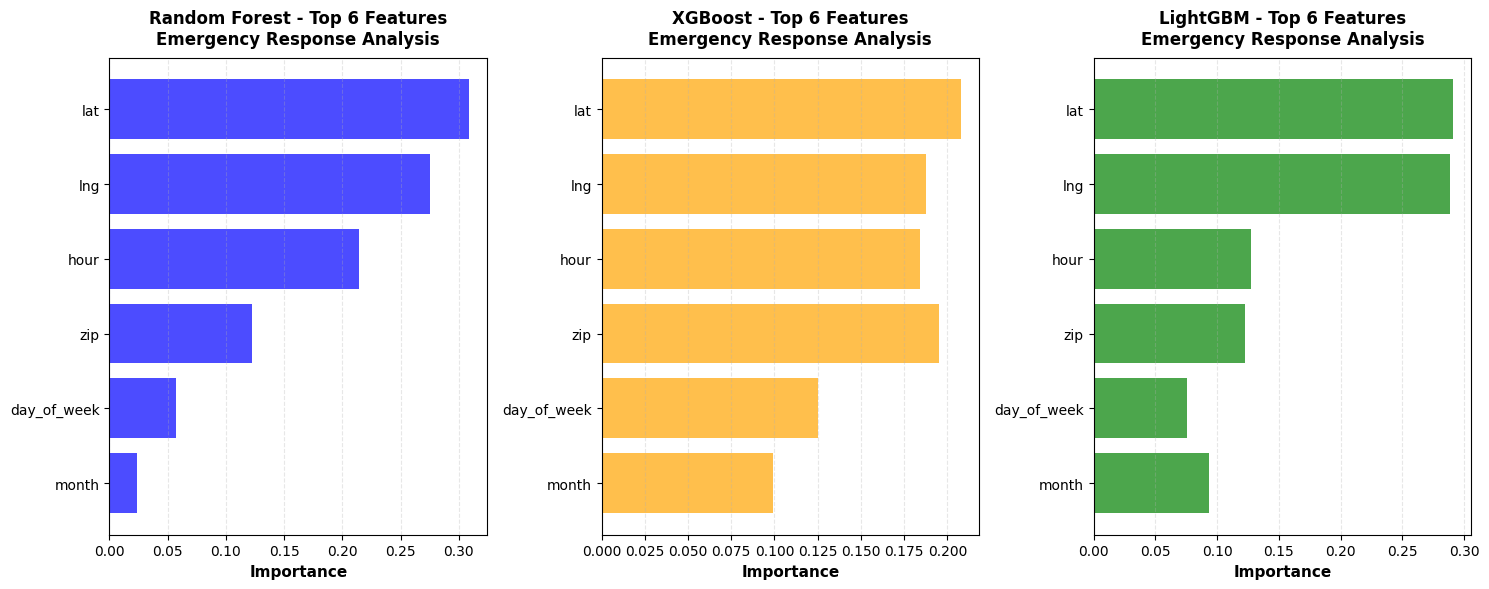


💡 DETAILED INTERPRETATION: Feature Importance

📊 WHAT YOU SEE:
   • Horizontal bar charts showing feature importance for each model
   • Each bar = One feature
   • Bar length = How important that feature is for predictions
   • Features sorted by importance (most important at top)

🔍 HOW TO READ IT:
   • Longer bars = More important features
   • Shorter bars = Less important features
   • Compare across models to see which features matter most
   • Features at top = Most important for emergency category prediction

💡 WHAT THIS TELLS US:
   • Which location/time features are most predictive of emergency type
   • How different models prioritize features
   • Which features to focus on for emergency response optimization

🎯 GDI APPLICATION - Emergency Response:
   • Identify key factors for predicting emergency types
   • Optimize resource allocation based on feature importance
   • Understand which location/time patterns indicate different emergencies
   • Improve emergency response 

In [14]:
# Visualize feature importance
if XGBOOST_AVAILABLE or LIGHTGBM_AVAILABLE:
    # Use actual number of features (we have 6 features, not 10)
    num_features = len(importance_df)
    top_n = min(10, num_features)  # Show top 10 or all features if less than 10
    top_features = importance_df.head(top_n)
    
    # Calculate number of subplots needed
    # Always show Random Forest, plus XGBoost and/or LightGBM if available
    num_plots = 1  # Random Forest
    if XGBOOST_AVAILABLE:
        num_plots += 1
    if LIGHTGBM_AVAILABLE:
        num_plots += 1
    
    # Create subplots
    fig, axes = plt.subplots(1, num_plots, figsize=(5*num_plots, 6))
    if not isinstance(axes, np.ndarray):
        axes = [axes]
    
    idx = 0
    # Random Forest (always shown)
    axes[idx].barh(range(len(top_features)), top_features['Random Forest'].values[::-1], 
                   alpha=0.7, color='blue')
    axes[idx].set_yticks(range(len(top_features)))
    axes[idx].set_yticklabels(top_features['Feature'].values[::-1])
    axes[idx].set_xlabel('Importance', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'Random Forest - Top {len(top_features)} Features\nEmergency Response Analysis', 
                        fontsize=12, fontweight='bold', pad=10)
    axes[idx].grid(True, alpha=0.3, axis='x', linestyle='--')
    idx += 1
    
    # XGBoost (if available)
    if XGBOOST_AVAILABLE:
        axes[idx].barh(range(len(top_features)), top_features['XGBoost'].values[::-1],
                      alpha=0.7, color='orange')
        axes[idx].set_yticks(range(len(top_features)))
        axes[idx].set_yticklabels(top_features['Feature'].values[::-1])
        axes[idx].set_xlabel('Importance', fontsize=11, fontweight='bold')
        axes[idx].set_title(f'XGBoost - Top {len(top_features)} Features\nEmergency Response Analysis', 
                            fontsize=12, fontweight='bold', pad=10)
        axes[idx].grid(True, alpha=0.3, axis='x', linestyle='--')
        idx += 1
    
    # LightGBM (if available)
    if LIGHTGBM_AVAILABLE:
        axes[idx].barh(range(len(top_features)), top_features['LightGBM'].values[::-1],
                      alpha=0.7, color='green')
        axes[idx].set_yticks(range(len(top_features)))
        axes[idx].set_yticklabels(top_features['Feature'].values[::-1])
        axes[idx].set_xlabel('Importance', fontsize=11, fontweight='bold')
        axes[idx].set_title(f'LightGBM - Top {len(top_features)} Features\nEmergency Response Analysis', 
                            fontsize=12, fontweight='bold', pad=10)
        axes[idx].grid(True, alpha=0.3, axis='x', linestyle='--')
        idx += 1
    
    plt.tight_layout()
    plt.savefig('boosting_feature_importance.png', dpi=300, bbox_inches='tight')
    print("\n✓ Plot saved as 'boosting_feature_importance.png'")
    plt.show()
    
    print("\n" + "=" * 70)
    print("💡 DETAILED INTERPRETATION: Feature Importance")
    print("=" * 70)
    print("\n📊 WHAT YOU SEE:")
    print(f"   • Horizontal bar charts showing feature importance for each model")
    print(f"   • Each bar = One feature")
    print(f"   • Bar length = How important that feature is for predictions")
    print(f"   • Features sorted by importance (most important at top)")
    print("\n🔍 HOW TO READ IT:")
    print("   • Longer bars = More important features")
    print("   • Shorter bars = Less important features")
    print("   • Compare across models to see which features matter most")
    print("   • Features at top = Most important for emergency category prediction")
    print("\n💡 WHAT THIS TELLS US:")
    print("   • Which location/time features are most predictive of emergency type")
    print("   • How different models prioritize features")
    print("   • Which features to focus on for emergency response optimization")
    print("\n🎯 GDI APPLICATION - Emergency Response:")
    print("   • Identify key factors for predicting emergency types")
    print("   • Optimize resource allocation based on feature importance")
    print("   • Understand which location/time patterns indicate different emergencies")
    print("   • Improve emergency response planning using feature insights")


---

## ❓ Common Student Questions | الأسئلة الشائعة للطلاب

**Q: What's the difference between boosting and bagging (Random Forest)?**
- **Answer**: 
  - **Boosting**: Sequential (each model learns from previous mistakes)
    - Model 1 → Model 2 fixes Model 1's mistakes → Model 3 fixes Model 2's mistakes
  - **Bagging (Random Forest)**: Parallel (models trained independently, then averaged)
    - Model 1, Model 2, Model 3 trained independently → average predictions
  - **Boosting**: Often better performance, but can overfit
  - **Bagging**: More stable, less overfitting, faster training
  - **Use boosting**: When you need best performance, have time to tune
  - **Use bagging**: When you need stability, faster training, less tuning

**Q: Why is XGBoost so popular?**
- **Answer**: XGBoost is fast, powerful, and handles many scenarios:
  - **Performance**: Often achieves best results in competitions
  - **Features**: Handles missing values, regularization built-in, feature importance
  - **Usability**: Easy to use, well-documented, widely supported
  - **Industry standard**: Used in production systems worldwide
  - **Rule**: XGBoost is often the first choice for tabular data (structured data)

**Q: What's the difference between XGBoost and LightGBM?**
- **Answer**: 
  - **XGBoost**: Level-wise tree growth (grows all leaves at same level), more stable
  - **LightGBM**: Leaf-wise tree growth (grows best leaves first), faster, uses less memory
  - **Speed**: LightGBM is faster than XGBoost (especially on large datasets)
  - **Memory**: LightGBM uses less memory than XGBoost
  - **Use LightGBM**: Large datasets (> 10k samples), need speed
  - **Use XGBoost**: Smaller datasets, need stability, more features

**Q: Why use boosting instead of just one decision tree?**
- **Answer**: Boosting combines weak learners into strong learner:
  - **Single tree**: Can overfit, limited performance
  - **Boosting**: Many trees combined → less overfitting, better performance
  - **Process**: Each tree corrects previous mistakes → sequential improvement
  - **Result**: Excellent performance (often best among ML algorithms)
  - **Rule**: Boosting > single tree for most problems

**Q: What is learning rate in boosting?**
- **Answer**: Learning rate controls how much each new tree contributes:
  - **Range**: Usually 0.01 to 0.3
  - **Low (0.01)**: Small steps, many trees needed, less overfitting, better performance
  - **High (0.3)**: Large steps, fewer trees needed, can overfit, faster training
  - **Rule of thumb**: Lower learning rate + more trees = better performance (but slower)
  - **Default**: XGBoost/LightGBM default is usually 0.1 (good starting point)

**Q: How many trees (n_estimators) should I use?**
- **Answer**: Balance between performance and training time:
  - **Too few (50-100)**: May underfit, poor performance
  - **Too many (1000+)**: May overfit, slow training, diminishing returns
  - **Good range**: 100-500 trees (depends on learning rate)
  - **Rule**: Lower learning rate → need more trees, higher learning rate → need fewer trees
  - **Tip**: Use early stopping to find optimal number automatically

**Q: Can boosting handle missing values?**
- **Answer**: **Yes!** XGBoost and LightGBM handle missing values automatically:
  - **XGBoost**: Learns best way to handle missing values during training
  - **LightGBM**: Also handles missing values automatically
  - **Advantage**: No need to impute missing values (unlike many other algorithms)
  - **Rule**: Boosting algorithms are robust to missing values
  - **Note**: Still good practice to check for missing values, but not required

**Q: When should I use boosting vs other algorithms?**
- **Answer**: 
  - **Use boosting**: Tabular data (structured data), need best performance, have time to tune
  - **Use Random Forest**: Need fast training, less tuning, more stability
  - **Use Logistic Regression**: Need interpretability, fast predictions, linear patterns
  - **Use Neural Networks**: Image/text data, very large datasets, complex patterns
  - **Rule**: Boosting is often best for tabular data, but try multiple algorithms

---


## Step 7: Decision Framework - Boosting Algorithm Selection | الخطوة 7: إطار القرار - اختيار خوارزمية التعزيز

**BEFORE**: You've learned XGBoost and LightGBM, but when should you use each boosting algorithm?

**AFTER**: You'll have a clear decision framework to choose between XGBoost, LightGBM, AdaBoost, and Gradient Boosting!

**Why this matters**: Using the wrong boosting algorithm can:
- **Poor performance** → Wrong algorithm may not fit your data well
- **Wasted computation** → Using slow algorithms when fast ones work
- **Wrong complexity** → Using complex algorithms when simple ones work

---

### 🎯 Decision Framework: Which Boosting Algorithm? | إطار القرار: أي خوارزمية تعزيز؟

**Key Question**: Should I use **XGBOOST**, **LIGHTGBM**, **ADABOOST**, or **GRADIENT BOOSTING**?

#### Decision Tree:

```
What type of problem do you have?
├─ REGRESSION → Use boosting regressors (XGBoost, LightGBM, Gradient Boosting)
│   └─ Why? All boosting algorithms support regression
│
└─ CLASSIFICATION → Check requirements:
    ├─ Need best performance? → Use XGBOOST or LIGHTGBM ✅
    │   └─ Why? State-of-the-art performance
    │
    ├─ Need speed? → Use LIGHTGBM ✅
    │   └─ Why? LightGBM is fastest
    │
    ├─ Need interpretability? → Use ADABOOST or GRADIENT BOOSTING ✅
    │   └─ Why? Simpler, more interpretable
    │
    ├─ Large dataset (>100k)? → Use LIGHTGBM ✅
    │   └─ Why? LightGBM handles large data efficiently
    │
    └─ Small dataset (<10k)? → Use XGBOOST or ADABOOST ✅
        └─ Why? Both work well on smaller data
```

#### Detailed Decision Process:

```
Step 1: Problem Type
├─ Regression → Continue to Step 2
└─ Classification → Continue to Step 2

Step 2: Dataset Size
├─ Large (>100,000 samples) → Use LIGHTGBM ✅
│   └─ Why? LightGBM is fastest, handles large data best
│
├─ Medium (10,000-100,000) → Continue to Step 3
└─ Small (<10,000) → Continue to Step 3

Step 3: Performance vs Speed
├─ Need best performance? → Use XGBOOST ✅
│   └─ Why? XGBoost often has best accuracy
│
├─ Need speed? → Use LIGHTGBM ✅
│   └─ Why? LightGBM is fastest
│
└─ Need balance? → Continue to Step 4

Step 4: Interpretability
├─ Need interpretability? → Use ADABOOST or GRADIENT BOOSTING ✅
│   └─ Why? Simpler, easier to understand
│
└─ Don't need interpretability? → Use XGBOOST or LIGHTGBM ✅
    └─ Why? Best performance, more complex
```

---

### 📊 Comparison Table: Boosting Algorithms | جدول المقارنة

| Algorithm | When to Use | Pros | Cons | Example |
|--------|-------------|------|------|---------|
| **XGBoost** | Best performance, competitions, medium-large data | • State-of-the-art performance<br>• Robust<br>• Feature importance<br>• Handles missing values | • Slower than LightGBM<br>• More memory<br>• Complex | Kaggle competitions, best accuracy needed |
| **LightGBM** | Large datasets, need speed, good performance | • Fastest<br>• Low memory<br>• Good performance<br>• Handles large data | • May overfit on small data<br>• Less robust than XGBoost | Large datasets, need speed |
| **AdaBoost** | Small datasets, interpretable, simple | • Simple<br>• Interpretable<br>• Works well on small data<br>• Fast | • May not be best performance<br>• Sensitive to outliers | Small datasets, need simplicity |
| **Gradient Boosting** | Medium datasets, interpretable, balanced | • Balanced performance<br>• Interpretable<br>• Good default | • Slower than XGBoost/LightGBM<br>• May not be best | Medium datasets, balanced needs |

---

### ✅ When to Use Each Algorithm | متى تستخدم كل خوارزمية

#### Use XGBoost when:
1. **Best Performance Needed** ✅
   - Need state-of-the-art accuracy
   - Competitions, critical applications
   - **Example**: Kaggle competitions, production systems needing best accuracy

2. **Medium to Large Datasets** ✅
   - 10,000-1,000,000 samples
   - XGBoost works well
   - **Example**: Most real-world datasets

3. **Robustness Important** ✅
   - Need robust model
   - XGBoost handles many edge cases
   - **Example**: Production systems, need reliability

4. **Feature Importance Needed** ✅
   - Need to understand feature importance
   - XGBoost provides good feature importance
   - **Example**: Understanding which features matter

#### Use LightGBM when:
1. **Large Datasets** ✅
   - More than 100,000 samples
   - LightGBM is fastest
   - **Example**: Big data, millions of samples

2. **Speed Critical** ✅
   - Need fast training and prediction
   - LightGBM is fastest boosting algorithm
   - **Example**: Real-time systems, quick iterations

3. **Memory Constraints** ✅
   - Limited memory available
   - LightGBM uses less memory
   - **Example**: Limited RAM, large datasets

4. **Good Performance + Speed** ✅
   - Need good performance but also speed
   - LightGBM balances both
   - **Example**: Production systems needing speed

#### Use AdaBoost when:
1. **Small Datasets** ✅
   - Less than 10,000 samples
   - AdaBoost works well on small data
   - **Example**: Small research datasets

2. **Interpretability Needed** ✅
   - Need to understand the model
   - AdaBoost is simpler, more interpretable
   - **Example**: Need to explain decisions

3. **Simple Solution** ✅
   - Want simple, straightforward model
   - AdaBoost is simplest boosting algorithm
   - **Example**: Quick prototyping, simple problems

#### Use Gradient Boosting when:
1. **Balanced Needs** ✅
   - Need balance of performance and interpretability
   - Gradient Boosting is balanced
   - **Example**: Medium datasets, need good performance

2. **Medium Datasets** ✅
   - 1,000-100,000 samples
   - Gradient Boosting works well
   - **Example**: Most business datasets

3. **Good Default** ✅
   - Need a good default boosting algorithm
   - Gradient Boosting is reliable
   - **Example**: Starting point, baseline

---

### ❌ When NOT to Use Each Algorithm | متى لا تستخدم كل خوارزمية

#### Don't use XGBoost when:
1. **Very Large Datasets** ❌
   - More than 1,000,000 samples
   - XGBoost is slower
   - **Use Instead**: LightGBM (faster)

2. **Speed Critical** ❌
   - Need very fast training
   - XGBoost is slower
   - **Use Instead**: LightGBM

3. **Small Datasets** ❌
   - Less than 1,000 samples
   - May overfit
   - **Use Instead**: AdaBoost or simpler models

#### Don't use LightGBM when:
1. **Small Datasets** ❌
   - Less than 10,000 samples
   - May overfit
   - **Use Instead**: XGBoost or AdaBoost

2. **Need Best Accuracy** ❌
   - Need absolute best performance
   - XGBoost often better
   - **Use Instead**: XGBoost

#### Don't use AdaBoost when:
1. **Large Datasets** ❌
   - More than 100,000 samples
   - AdaBoost is slow
   - **Use Instead**: XGBoost or LightGBM

2. **Best Performance Needed** ❌
   - Need state-of-the-art accuracy
   - AdaBoost may not be best
   - **Use Instead**: XGBoost or LightGBM

#### Don't use Gradient Boosting when:
1. **Best Performance Needed** ❌
   - Need absolute best accuracy
   - XGBoost/LightGBM usually better
   - **Use Instead**: XGBoost or LightGBM

2. **Speed Critical** ❌
   - Need fast training
   - Gradient Boosting is slower
   - **Use Instead**: LightGBM

---

### 📊 Real-World Examples | أمثلة من العالم الحقيقي

#### Example 1: Kaggle Competition ✅ XGBOOST
- **Problem**: Classification competition
- **Dataset**: Medium (50,000 samples)
- **Need**: Best performance (winning competition)
- **Decision**: ✅ Use XGBoost
- **Reasoning**: Need best performance, medium dataset, XGBoost often wins

#### Example 2: Large-Scale Customer Segmentation ✅ LIGHTGBM
- **Problem**: Segment 1,000,000 customers
- **Dataset**: Large (1,000,000 samples)
- **Need**: Speed and good performance
- **Decision**: ✅ Use LightGBM
- **Reasoning**: Large dataset, need speed, LightGBM handles large data best

#### Example 3: Small Medical Dataset ✅ ADABOOST
- **Problem**: Diagnose disease from 500 patients
- **Dataset**: Small (500 samples)
- **Need**: Interpretability and simplicity
- **Decision**: ✅ Use AdaBoost
- **Reasoning**: Small dataset, need interpretability, AdaBoost works well

#### Example 4: Medium Business Dataset ✅ XGBOOST or GRADIENT BOOSTING
- **Problem**: Predict customer churn
- **Dataset**: Medium (20,000 samples)
- **Need**: Good performance, balanced
- **Decision**: ✅ Use XGBoost (or Gradient Boosting)
- **Reasoning**: Medium dataset, need good performance, both work well

---

### ✅ Key Takeaways | النقاط الرئيسية

1. **Best performance → XGBoost** - Use for competitions and best accuracy
2. **Large data + speed → LightGBM** - Use for large datasets needing speed
3. **Small data → AdaBoost** - Use for small datasets, interpretability
4. **Balanced → Gradient Boosting** - Use for balanced needs
5. **Try multiple** - Often try XGBoost and LightGBM, pick the best
6. **Tune hyperparameters** - All boosting algorithms need tuning
7. **Feature importance** - All provide feature importance

---

### 🎓 Practice Decision-Making | ممارسة اتخاذ القرار

**Scenario 1**: Kaggle competition with 30,000 samples
- **Dataset**: Medium (30,000)
- **Need**: Best performance (winning)
- **Decision**: ✅ XGBoost (best performance, medium dataset)

**Scenario 2**: Real-time fraud detection with 500,000 transactions
- **Dataset**: Large (500,000)
- **Need**: Speed and good performance
- **Decision**: ✅ LightGBM (large dataset, need speed)

**Scenario 3**: Medical diagnosis with 800 patients
- **Dataset**: Small (800)
- **Need**: Interpretability
- **Decision**: ✅ AdaBoost (small dataset, need interpretability)

---

**Connection to Next Steps**: 
- 📓 **Example 1: Grid Search** - For tuning boosting hyperparameters
- 📓 **All ML Projects** - Boosting algorithms are powerful tools
- 📓 **Production Systems** - Choose algorithm based on your needs



6. Confusion Matrices Comparison
مقارنة مصفوفات الارتباك

💡 Transition: Let's visualize how well each model classifies emergency types!
   Note: ROC curves are for binary classification only.
   For multi-class (3 classes: EMS, Fire, Traffic), we use confusion matrices instead!

✓ Plot saved as 'boosting_confusion_matrices.png'


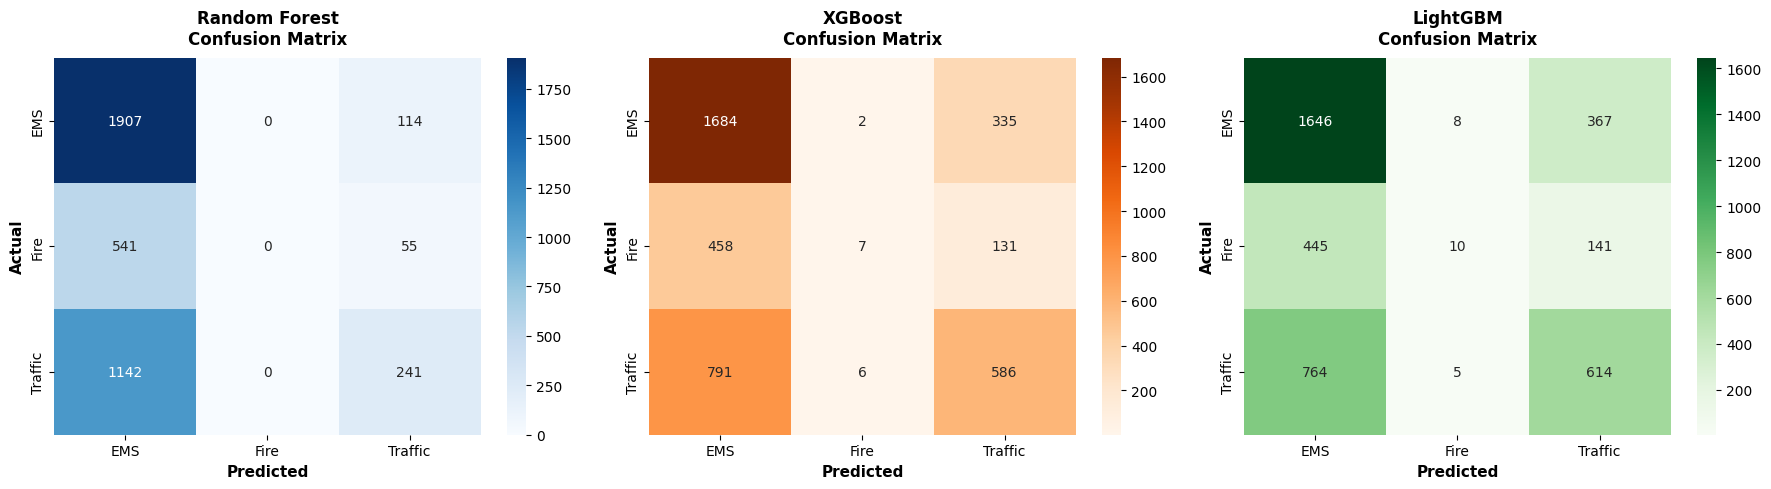


💡 DETAILED INTERPRETATION: Confusion Matrices (Multi-class)

📊 WHAT YOU SEE:
   • Heatmaps showing confusion matrices for each model
   • Each cell = Number of predictions
   • Rows = Actual emergency categories (EMS, Fire, Traffic)
   • Columns = Predicted emergency categories

🔍 HOW TO READ IT:
   • Diagonal cells (top-left to bottom-right) = Correct predictions
   • Off-diagonal cells = Incorrect predictions
   • Darker colors = More predictions
   • Perfect model = All values on diagonal, zeros elsewhere

💡 WHAT THIS TELLS US:
   • Which emergency types are predicted correctly most often
   • Which emergency types are confused with each other
   • Overall model performance for each emergency category

🎯 GDI APPLICATION - Emergency Response:
   • Understand which emergency types are easiest/hardest to predict
   • Identify patterns in misclassifications (e.g., Fire vs Traffic)
   • Optimize emergency response based on prediction accuracy
   • Improve resource allocation using class


✓ Plot saved as 'xgb_learning_curve.png'


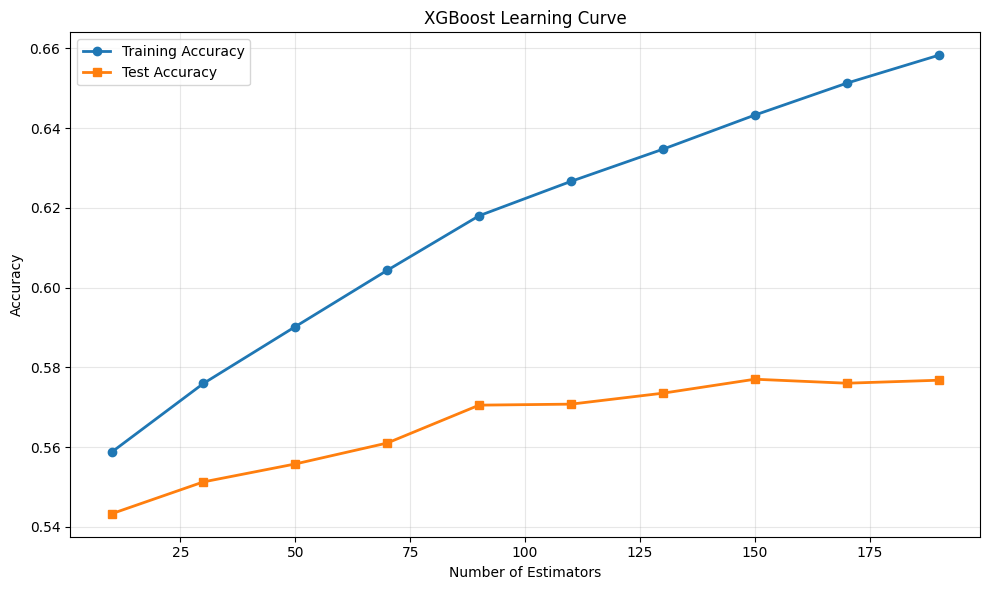


Example 2 Complete! ✓
اكتمل المثال 2! ✓


In [15]:
# 6. Confusion Matrices Comparison (Multi-class Classification)
print("\n" + "=" * 60)
print("6. Confusion Matrices Comparison")
print("مقارنة مصفوفات الارتباك")
print("=" * 60)
print("\n💡 Transition: Let's visualize how well each model classifies emergency types!")
print("   Note: ROC curves are for binary classification only.")
print("   For multi-class (3 classes: EMS, Fire, Traffic), we use confusion matrices instead!")

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions
y_pred_rf = rf.predict(X_test)
if XGBOOST_AVAILABLE:
    y_pred_xgb = xgb_model.predict(X_test)
if LIGHTGBM_AVAILABLE:
    y_pred_lgb = lgb_model.predict(X_test)

# Calculate number of subplots
num_plots = 1  # Random Forest
if XGBOOST_AVAILABLE:
    num_plots += 1
if LIGHTGBM_AVAILABLE:
    num_plots += 1

# Create subplots
fig, axes = plt.subplots(1, num_plots, figsize=(6*num_plots, 5))
if not isinstance(axes, np.ndarray):
    axes = [axes]

# Get category names for labels
if 'category_names' in globals():
    class_names = category_names
else:
    class_names = ['EMS', 'Fire', 'Traffic']  # Default fallback

idx = 0
# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
            xticklabels=class_names, yticklabels=class_names)
axes[idx].set_xlabel('Predicted', fontsize=11, fontweight='bold')
axes[idx].set_ylabel('Actual', fontsize=11, fontweight='bold')
axes[idx].set_title('Random Forest\nConfusion Matrix', fontsize=12, fontweight='bold', pad=10)
idx += 1

# XGBoost
if XGBOOST_AVAILABLE:
    cm_xgb = confusion_matrix(y_test, y_pred_xgb)
    sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges', ax=axes[idx],
                xticklabels=class_names, yticklabels=class_names)
    axes[idx].set_xlabel('Predicted', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Actual', fontsize=11, fontweight='bold')
    axes[idx].set_title('XGBoost\nConfusion Matrix', fontsize=12, fontweight='bold', pad=10)
    idx += 1

# LightGBM
if LIGHTGBM_AVAILABLE:
    cm_lgb = confusion_matrix(y_test, y_pred_lgb)
    sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Greens', ax=axes[idx],
                xticklabels=class_names, yticklabels=class_names)
    axes[idx].set_xlabel('Predicted', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Actual', fontsize=11, fontweight='bold')
    axes[idx].set_title('LightGBM\nConfusion Matrix', fontsize=12, fontweight='bold', pad=10)
    idx += 1

plt.tight_layout()
plt.savefig('boosting_confusion_matrices.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'boosting_confusion_matrices.png'")
plt.show()

print("\n" + "=" * 70)
print("💡 DETAILED INTERPRETATION: Confusion Matrices (Multi-class)")
print("=" * 70)
print("\n📊 WHAT YOU SEE:")
print(f"   • Heatmaps showing confusion matrices for each model")
print(f"   • Each cell = Number of predictions")
print(f"   • Rows = Actual emergency categories ({', '.join(class_names)})")
print(f"   • Columns = Predicted emergency categories")
print("\n🔍 HOW TO READ IT:")
print("   • Diagonal cells (top-left to bottom-right) = Correct predictions")
print("   • Off-diagonal cells = Incorrect predictions")
print("   • Darker colors = More predictions")
print("   • Perfect model = All values on diagonal, zeros elsewhere")
print("\n💡 WHAT THIS TELLS US:")
print("   • Which emergency types are predicted correctly most often")
print("   • Which emergency types are confused with each other")
print("   • Overall model performance for each emergency category")
print("\n🎯 GDI APPLICATION - Emergency Response:")
print("   • Understand which emergency types are easiest/hardest to predict")
print("   • Identify patterns in misclassifications (e.g., Fire vs Traffic)")
print("   • Optimize emergency response based on prediction accuracy")
print("   • Improve resource allocation using classification insights")

# 7. Learning Curve (XGBoost)
print("\n" + "=" * 60)
print("7. Learning Curve Example (XGBoost)")
print("مثال منحنى التعلم (XGBoost)")
print("=" * 60)
print("\n💡 Transition: Let's see how XGBoost performance changes with more trees!")
print("   This helps us understand the relationship between model complexity and performance.")
if XGBOOST_AVAILABLE:
    # Train with different number of estimators
    n_estimators_range = range(10, 201, 20)
    train_scores = []
    test_scores = []
    for n_est in n_estimators_range:
        xgb_temp = xgb.XGBClassifier(
            n_estimators=n_est,
            max_depth=5,
            learning_rate=0.1,
            random_state=73,  # Using 73 for consistency
            eval_metric='logloss'
        )
        xgb_temp.fit(X_train, y_train)
        train_scores.append(accuracy_score(y_train, xgb_temp.predict(X_train)))
        test_scores.append(accuracy_score(y_test, xgb_temp.predict(X_test)))
    plt.figure(figsize=(10, 6))
    plt.plot(n_estimators_range, train_scores, 'o-', label='Training Accuracy', linewidth=2)
    plt.plot(n_estimators_range, test_scores, 's-', label='Test Accuracy', linewidth=2)
    plt.xlabel('Number of Estimators')
    plt.ylabel('Accuracy')
    plt.title('XGBoost Learning Curve')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('xgb_learning_curve.png', dpi=300, bbox_inches='tight')
    print("\n✓ Plot saved as 'xgb_learning_curve.png'")
    plt.show()

print("\n" + "=" * 60)
print("Example 2 Complete! ✓")
print("اكتمل المثال 2! ✓")
print("=" * 60)
if not XGBOOST_AVAILABLE or not LIGHTGBM_AVAILABLE:
    print("\nNote: Install missing packages for full functionality:")
    if not XGBOOST_AVAILABLE:
        print("  pip install xgboost")
    if not LIGHTGBM_AVAILABLE:
        print("  pip install lightgbm")
